In [86]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [87]:
house=pd.read_csv('/home/shashu/python and data science/housing.csv')

In [89]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [90]:
house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [91]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [92]:
house.total_rooms

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [93]:
house["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [94]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


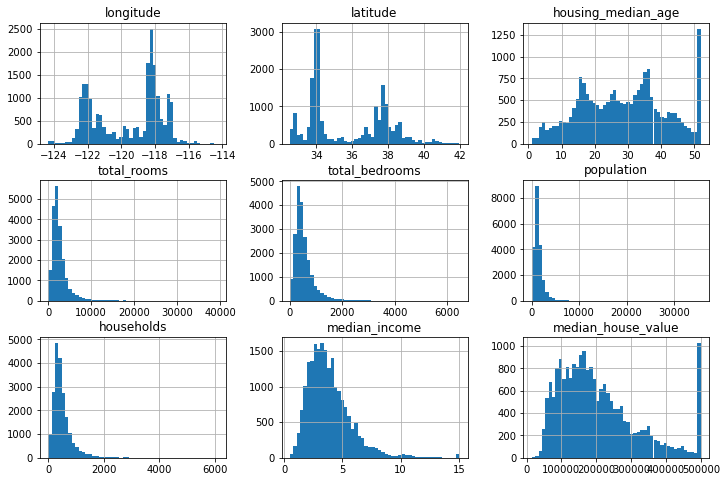

In [95]:
house.hist(bins=50,figsize=(12,8))
plt.show()

In [96]:
##preaparing training and test set

def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],.iloc[test_indices]

train_set,test_set=split_train_test(house,0.2)
print(len(train_set), "train +",len(test_set),"test")

SyntaxError: invalid syntax (3700651110.py, line 6)

In [97]:
import hashlib

def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

house_with_id=house.reset_index()
train_set,test_set=split_train_test_by_id(house_with_id,0.2,"index")

In [98]:
house_with_id["id"]=house["longitude"]*1000+house["latitude"]
train_set,test_set=split_train_test_by_id(house_with_id,0.2,"id")


In [99]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(house,test_size=0.2,random_state=42)

In [100]:
house["income_cat"]=np.ceil(house["median_income"]/1.5)
house["income_cat"].where(house["income_cat"]<5,5.0,inplace=False)

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [101]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [102]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(house,house["income_cat"]):
    strat_train_set=house.loc[train_index]
    strat_test_set=house.loc[test_index]

house["income_cat"].value_counts()/len(house)

3.0     0.350581
2.0     0.318847
4.0     0.176308
5.0     0.068944
1.0     0.039826
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

In [103]:
for set in(strat_train_set,strat_test_set):
    set.drop(["income_cat"],axis=1,inplace=True)

In [104]:
house.pop('income_cat')

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [105]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [106]:
house=strat_train_set.copy()

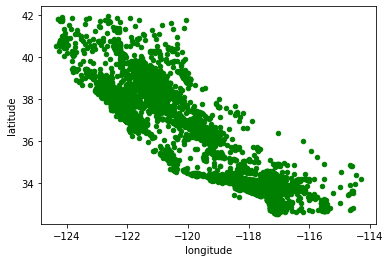

In [107]:
house.plot(kind="scatter",x="longitude",y="latitude",color='g')
plt.show()

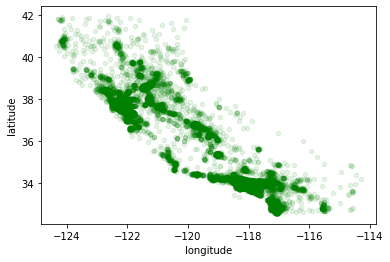

In [108]:
house.plot(kind="scatter",x="longitude",y="latitude",color='g',alpha=0.1)
plt.show()

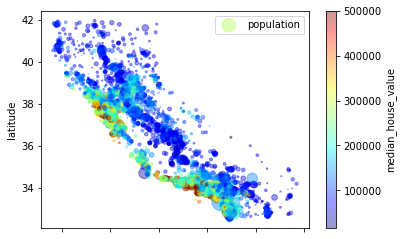

In [109]:
house.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
           s=house["population"]/100,label="population",
           c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
          )
plt.legend()
           
          
          
plt.show()      



In [110]:
corr_matrix=house.corr()

In [111]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687474
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049177
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

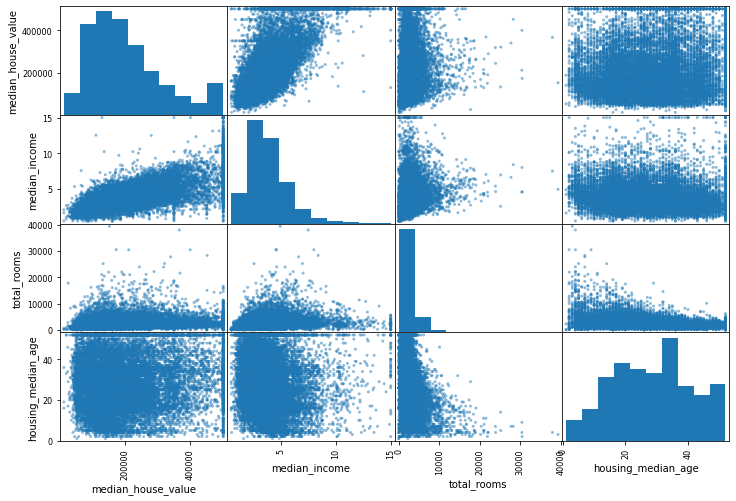

In [112]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(house[attributes],figsize=(12,8))


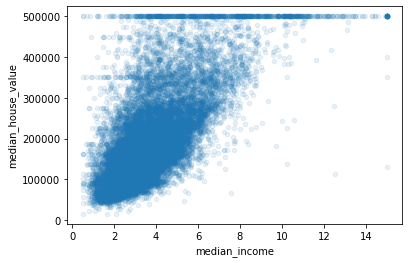

In [113]:
house.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

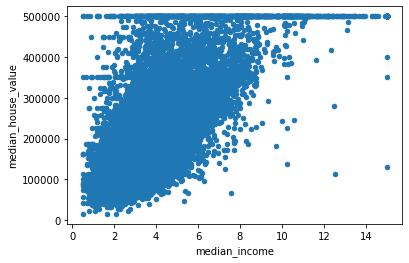

In [114]:
house.plot(kind="scatter",x="median_income",y="median_house_value")
plt.show()

In [115]:
house["rooms_per_household"]=house["total_rooms"]/house["households"]
house["bedrooms_per_room"]=house["total_bedrooms"]/house["total_rooms"]
house["population_per_households"]=house["population"]/house["households"]

corr_matrix=house.corr()
corr_matrix["bedrooms_per_room"].sort_values(ascending=False)

bedrooms_per_room            1.000000
housing_median_age           0.138415
longitude                    0.092702
total_bedrooms               0.083918
households                   0.064310
population                   0.034053
population_per_households    0.004178
latitude                    -0.114027
total_rooms                 -0.194665
median_house_value          -0.259679
rooms_per_household         -0.398273
median_income               -0.625484
Name: bedrooms_per_room, dtype: float64

In [116]:
house["rooms_per_household"]=house["total_rooms"]/house["households"]
house["bedrooms_per_room"]=house["total_bedrooms"]/house["total_rooms"]
house["population_per_households"]=house["population"]/house["households"]

corr_matrix=house.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687474
rooms_per_household          0.145750
total_rooms                  0.135989
housing_median_age           0.111770
households                   0.065841
total_bedrooms               0.049177
population_per_households   -0.021844
population                  -0.024765
longitude                   -0.045056
latitude                    -0.144684
bedrooms_per_room           -0.259679
Name: median_house_value, dtype: float64

In [117]:
house=strat_train_set.drop("median_house_value",axis=1)
house_labels=strat_train_set["median_house_value"].copy()

In [30]:
##data cleaning

In [118]:
house.dropna(subset=["total_bedrooms"])
house.drop("total_bedrooms",axis=1)

median=house["total_bedrooms"].median()
house["total_bedrooms"].fillna(median)

17606     351.0
15698      96.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [25]:
#from sklearn.preprocessing import Imputer
#imputer = imputer(strategy="median")
#house_num=house.drop("ocean_proximity",axis=1)

In [119]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
house_num=house.drop("ocean_proximity",axis=1)

In [120]:
imputer.fit(house_num)

SimpleImputer(strategy='median')

In [121]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [122]:
house_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [123]:
x=imputer.transform(house_num)

In [124]:
x

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-122.46  ,   37.79  ,   52.    , ...,  304.    ,  110.    ,
          14.2959],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [126]:
house_tr=pd.DataFrame(x,columns=house_num.columns)

In [128]:
house_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [129]:
##converting text columns attribute to numerical attribute

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
house_cat=house["ocean_proximity"]
house_cat_encoded=encoder.fit_transform(house_cat)
house_cat_encoded

array([0, 3, 4, ..., 1, 0, 3])

In [130]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [131]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
house_cat_1hot=encoder.fit_transform(house_cat_encoded.reshape(-1,1))
house_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [132]:
house_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [133]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
house_cat_1hot=encoder.fit_transform(house_cat)
house_cat_1hot

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [136]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
        
    def fit(self,x,y=None):
        return self
    
    def transform(self,x,y=None):
        rooms_per_household=x[:,rooms_ix]/x[:,household_ix]
        population_per_household=x[:,population_ix]/x[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room=x[:,bedrooms_ix]/ x[:,rooms_ix]
            
            return np.c_[x,rooms_per_household,population_per_household,bedrooms_per_room]
        
        else:
            return np.c_[x,rooms_per_household,population_per_household]
        
        
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
house_extra_attribs=attr_adder.transform(house.values)
    

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scalar',StandardScaler()),
])

house_num_tr=num_pipeline.fit_transform(house_num)

In [137]:
house_num_tr


array([[-1.15788621,  0.77388697,  0.74440696, ..., -0.31200699,
        -0.08649926,  0.1663318 ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  1.04438561,
        -0.02872844, -1.72035025],
       [ 1.18471864, -1.3403487 ,  0.18806557, ..., -0.46505337,
        -0.09240558,  0.44738297],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.34606045,
        -0.0305544 , -0.5467078 ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.02457121,
         0.06150939, -0.31674597],
       [-1.43760023,  0.99840757,  1.85708974, ..., -0.22859871,
        -0.09586355,  0.10997909]])

In [139]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values



from sklearn.pipeline import FeatureUnion

num_attribs=list(house_num)
cat_attribs=["ocean_proximity"]

num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('one_hot_encoder', OneHotEncoder(sparse=False))
])

full_pipeline=FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
    
])




In [140]:
house_prepared.shape

(16512, 16)

In [141]:
house_prepared=full_pipeline.fit_transform(house)
house_prepared

array([[-1.15788621,  0.77388697,  0.74440696, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.18471864, -1.3403487 ,  0.18806557, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.        ,
         1.        ,  0.        ]])

In [144]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(house_prepared,house_labels)

some_data=house.iloc[:5]
some_labels=house_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("predictions: \t",lin_reg.predict(some_data_prepared))
print("labels:\t\t",list(some_labels))


predictions: 	 [209300.18149413 661078.1135578  210913.91718561  57466.84542129
 186707.41879655]
labels:		 [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [145]:
from sklearn.metrics import mean_squared_error
house_predictions=lin_reg.predict(house_prepared)
lin_mse=mean_squared_error(house_labels,house_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse


68321.70513040475

In [146]:
house_labels

17606    286600.0
15698    500001.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [147]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(house_prepared,house_labels)

house_predictions=tree_reg.predict(house_prepared)
tree_mse=mean_squared_error(house_labels,house_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [148]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,house_prepared,house_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [149]:
def display_scores(scores):
    print("scores:",scores,"\n")
    print("mean",scores.mean(),"\n")
    print("standard deviation: ",scores.std(),"\n")


display_scores(rmse_scores)

scores: [69067.8934666  68141.42802643 67702.33291346 69736.64244756
 70085.79013067 74384.24583381 69071.72520338 73007.07222978
 75717.22229584 72446.55179532] 

mean 70936.09043428548 

standard deviation:  2621.344808264682 



In [150]:
lin_scores=cross_val_score(tree_reg,house_prepared,house_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display(lin_rmse_scores)

array([67681.22711233, 67296.64657316, 68596.55768436, 69242.48119633,
       68928.14946664, 75510.56822183, 68549.56324437, 74803.60204096,
       76605.29734628, 70249.1374327 ])

In [151]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(house_prepared,house_labels)
[...]
forest_rmse

display_scores(forest_rmse)



NameError: name 'forest_rmse' is not defined

In [ ]:
import sklearn.externals
import joblib





In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
import sklearn.externals
import joblib

joblib.dump(my_model,"my_model.pkl")

my_model_loaded=joblib.load("my_model.pkl")

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
    
]

forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(house_prepared,house_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [152]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [155]:
grid_search.best_estimator_


RandomForestRegressor(max_features=6, n_estimators=30)

####RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=None,max_features=6,
                      max_leaf_nodes=None,min_samples_leaf=1,
                     min_samples_split=2,min_weight_fraction_leaf=0.0,
                     n_estimator=30,n_jobs=1,oob_score=False,random_state=None,
                     verbose=0,warm_start=False)

In [157]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances


array([7.30138964e-02, 7.24081384e-02, 4.52378558e-02, 1.77709800e-02,
       1.68625452e-02, 1.72918236e-02, 1.50155565e-02, 3.18773745e-01,
       7.49503178e-02, 1.08573146e-01, 7.19215365e-02, 1.06485937e-02,
       1.49574930e-01, 4.14382274e-05, 3.00907871e-03, 4.90641854e-03])

In [158]:
list(encoder.classes_)

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [159]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [163]:
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs=list(encoder.classes_)
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3187737446539887, 'median_income'),
 (0.14957492968201913, 'INLAND'),
 (0.10857314618077639, 'pop_per_hhold'),
 (0.07495031781266417, 'rooms_per_hhold'),
 (0.07301389644512131, 'longitude'),
 (0.07240813844801643, 'latitude'),
 (0.07192153650944927, 'bedrooms_per_room'),
 (0.045237855801500394, 'housing_median_age'),
 (0.017770979999115186, 'total_rooms'),
 (0.017291823563489708, 'population'),
 (0.016862545240814646, 'total_bedrooms'),
 (0.015015556474783528, 'households'),
 (0.010648593713960432, '<1H OCEAN'),
 (0.004906418537624002, 'NEAR OCEAN'),
 (0.0030090787092540874, 'NEAR BAY'),
 (4.1438227422602105e-05, 'ISLAND')]

In [167]:
final_model=grid_search.best_estimator_

x_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()
x_test_prepared=full_pipeline.transform(x_test)
final_predictions=final_model.predict(x_test_prepared)

final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

47377.99114429632